# Inaugural project

In [21]:
%load_ext autoreload 
%autoreload 2
from Inaugural_project import HouseholdSpecializationModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import numpy as np
from scipy import optimize
import pandas as pd 
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Question 1

To illutrate how the ratio of HF & HM changes when alpha and sigma changes it is neccesary to adapt the "HouseholdSpecializationModel" provided in this assignment. This has been done by implementing n "if/else-argument" in the code that contians the constrints regarding the homeproduction (H). Please see the Inaugural_project.py file to see these changes where the model is specifyed.

In [36]:
# In this line of code I fix the model (m) to the class created in the exsample.
m = HouseholdSpecializationModelClass()

# Here I create two lists that contains the values of the alphas & sigmas
value_alphas = [0.25, 0.50, 0.75]
value_sigmas = [0.5, 1, 1.5]

# Firstly, I create empty lists to store the values of HF & HM
list_HF = []
list_HM = []

# The next few lines of code is a loop that "loops over" the posible values of alpha & sigma and solves the model
for i in value_alphas:
    for j in value_sigmas:
        m.par.alpha = i
        m.par.sigma = j
    
        opt = m.solve_discrete()
        
        # The optimal values of HM and HF will be appened to (before) empty lists
        list_HF.append(opt.HF)
        list_HM.append(opt.HM)

# Using numpy to converte the lists of optimal values into numpy-arrays

array_HF = np.array(list_HF)
array_HM = np.array(list_HM) 

# Finding to ratios by dividing the arrays for HF & HM
array_HFHM = array_HF/array_HM

# Creating a solution-matrix 
matrix_HFHM = array_HFHM.reshape(len(value_alphas), len(value_sigmas))

# printing the result
print(matrix_HFHM)

[[0.54545455 0.30769231 0.21428571]
 [1.         1.         1.        ]
 [1.83333333 3.25       4.66666667]]


NOTE: I have trobule creating a propper table. However, the alpha values should be on the left side (rows) and the sigma values should be illustrated on top of the table (collums).

With that in mind, the tables illustrate that when alpha=0.25 the ratio between HF/HM is decreasing as sigma are increasing. When alpha=0.75 the ratio increases as the value of sigma increases as well. The ratio will always be equal to 1 when alpha=0.5 even when the value of sigma changes.

# Question 2

In this question we need to examine what happens to the ratio when the wages of the female member of the houshold changes [0.8, 0.9, 1.0, 1.1, 1.2]. 

In [44]:
# Setting alpha & sigma such that the male & female are equal in terms of homeprodoction
m.par.alpha = 0.5
m.par.sigma = 1

# creating empty lists - just like in the previuos question - to store the values that contain log of H & w 
log_ratioH = []
log_ratiow = []

# looping over the the values of w_F and solves the model 
for i in m.par.wF_vec:
    m.par.wF = i
    # solve model discretely
    result1 = m.solve_discrete()
    
    # append the results of the log of the household-ratio to the empty list 
    log_ratioH.append(np.log(result1.HF/result1.HM))
    # append the results of the log of the wages-ratio to the empty list 
    log_ratiow.append(np.log(i/m.par.wM))

# d. construct a dataframe of the results os far
df_plot = pd.DataFrame({"w_f": m.par.wF_vec, "H-ratio": np.round(log_ratioH, 4), "w-ratio": np.round(log_ratiow, 4)})
df_plot

,w_f,H-ratio,w-ratio
0,0.8,0.2231,-0.2231
1,0.9,0.0000,-0.1054
2,1.0,0.0000,0.0000
3,1.1,-0.1178,0.0953
4,1.2,-0.2231,0.1823


From the table above we see that when when womans wages increases then their householdproduction decreases and the other way arround. One of the interesting things about this result is that when the men and woman are equal in houseproduction (when w_F=0.9) the wage-ratio is negative. Maybe this illustrate the problem of equal-pay between men and woman...?

Illustrating the results and interpretation in a plot below. 

Text(0, 0.5, 'log(H_F/H_M)')

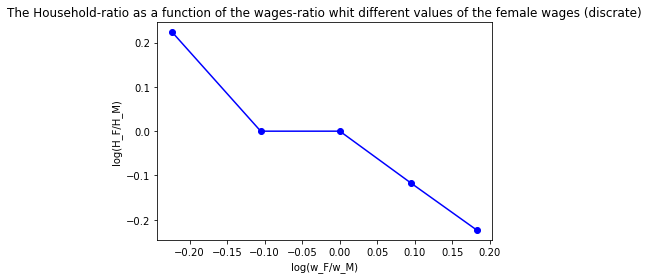

In [60]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df_plot['w-ratio'],df_plot['H-ratio'], 'bo-')
ax.set_title('The Household-ratio as a function of the wages-ratio whit different values of the female wages (discrate)')
ax.set_xlabel('log(w_F/w_M)')
ax.set_ylabel('log(H_F/H_M)')

# Question 3

Here we need to do the same like in question 2 but solve the model for contiuous choice instead of discreate.

Text(0, 0.5, 'log(H_F/H_M)')

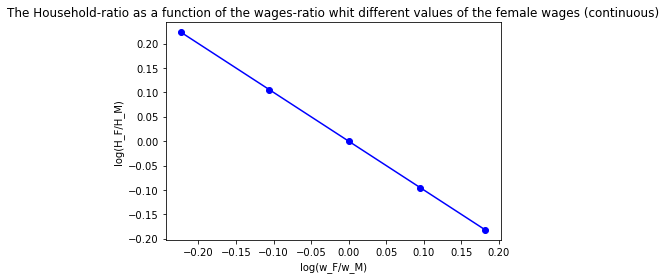

In [67]:
# instead of creating empty lists and filling them with the results one can take a different approach
# we can call "solve" directly from the class and putting in the argument "discrete=False" to solve the model for continuous
m.solve_wF_vec(discrete=False)

# We can also caluculate the ratios of wages and household production by using 
conlog_Hratio = np.log(m.sol.HF_vec/m.sol.HM_vec)
conlog_wratio = np.log(m.par.wF_vec/m.par.wM)

# create plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(conlog_wratio, conlog_Hratio, 'bo-')
ax.set_title('The Household-ratio as a function of the wages-ratio whit different values of the female wages (continuous)')
ax.set_xlabel('log(w_F/w_M)')
ax.set_ylabel('log(H_F/H_M)')

In [68]:
df_plot = pd.DataFrame({"w_f": m.par.wF_vec, "H-ratio": np.round(conlog_Hratio, 4), "w-ratio": np.round(conlog_wratio, 4)})
df_plot

,w_f,H-ratio,w-ratio
0,0.8,0.2231,-0.2231
1,0.9,0.1054,-0.1054
2,1.0,0.0000,0.0000
3,1.1,-0.0953,0.0953
4,1.2,-0.1823,0.1823


When solving the model for contiuous choice the results came out much more smooth which is illustrated in the graph above. The equal pay-gab between men and woman like I mentond ealier is gone.